# **Introduction**

Dans ce projet, nous allons fine-tuner le modèle de langage **Mistral-7B** en utilisant le dataset **Instruction-Poems**. L'objectif est de créer un modèle capable de générer des poèmes cohérents, créatifs, et adaptés à des instructions spécifiques. Ce projet implique une exploration approfondie des données, un nettoyage méthodique, une préparation minutieuse pour l'entraînement, et une évaluation rigoureuse des performances du modèle.

### Plan de travail
1. **Exploration des données** : Analyser le dataset **Instruction-Poems** pour identifier les spécificités, les anomalies, et les opportunités d'amélioration. L'objectif est de bien comprendre la structure des instructions et des poèmes.
2. **Nettoyage des données** : Éliminer les exemples inutilisables ou mal formatés, corriger les incohérences et garantir un format standardisé pour chaque instruction et son poème associé.
3. **Préparation des données** : Tokenisation, normalisation des textes et séparation en ensembles d'entraînement et de validation, tout en préservant un équilibre entre les différents types d'instructions.
4. **Fine-tuning du modèle** : Adapter le modèle **Mistral-7B** pour qu'il excelle dans la génération de poèmes basés sur des instructions données. Nous utiliserons des techniques comme le fine-tuning supervisé (SFT) et des méthodes de fine-tuning efficaces comme LoRA pour optimiser les ressources.
5. **Évaluation des performances** : Mesurer la qualité des poèmes générés à l'aide de métriques adaptées telles que BLEU, ROUGE, et des évaluations humaines pour juger de la créativité et de la pertinence des résultats.

#**1. Exploration des données**

Installation des Dépendances Nécessaires

In [1]:
!pip install transformers[torch] datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install bitsandbytes trl peft tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.9/313.9 kB 27.9 MB/s eta 0:00:00


In [3]:
!pip install accelerate tqdm rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=2e17fe87acddd13c21c7acfcd2bfdf56354c31bb4638e5d5c33aa1a80d5d6b4d
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


In [4]:
!pip install flash-attn --no-build-isolation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 50.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for flash-attn: filename=flash_attn-2.7.4.post1-cp311-cp311-linux_x86_64.whl size=187815463 sha256=d944fc7d2f962bce83fc4708c2fc0c21eaf8255962a0b350ae919362a51b7ef2
  Stored in directory: /root/.cache/pip/wheels/3d/88/d8/284b89f56af7d5bf366b10d6b8e251ac8a7c7bf3f04203fb4f
Successfully built flash-attn


Chargement des Bibliothèques

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datasets import load_dataset

Chargement des Jeux de Données

In [6]:
ds = load_dataset("checkai/instruction-poems")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/80.0 [00:00<?, ?B/s]

output.parquet:   0%|          | 0.00/17.6M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/13854 [00:00<?, ? examples/s]

In [7]:
ds

DatasetDict({
    train: Dataset({
        features: ['INSTRUCTION', 'RESPONSE', 'SOURCE', 'METADATA'],
        num_rows: 13854
    })
})

Conversion de `df` en DataFrame

In [8]:
df = pd.DataFrame(ds['train'])

In [9]:
df.head()

,INSTRUCTION,RESPONSE,SOURCE,METADATA
0,"Compose a poem, about Living,Death,The Body,Na...","I've written a poem for you about Living,Death...",PoetryFoundation.org - kari edwards,"{""author"": ""kari edwards"", ""title"": ""\""[ready ..."
1,"Make a poem with themes of Religion,Faith & Do...","Here's a beautiful poem about Religion,Faith &...",PoetryFoundation.org - Thomas P. Lynch,"{""author"": ""Thomas P. Lynch"", ""title"": ""\""Argy..."
2,"Make a poem with themes of Religion,Faith & Do...","Sure, I can do that. Here's a poem about Relig...",PoetryFoundation.org - Robert Bly,"{""author"": ""Robert Bly"", ""title"": ""\""Wanting S..."
3,"Write me a poem about Religion,Faith & Doubt,G...","Here's a poem I composed about Religion,Faith ...",PoetryFoundation.org - Sheena Raza Faisal,"{""author"": ""Sheena Raza Faisal"", ""title"": ""\""a..."
4,"Write me a poem about Living,Growing Old,Natur...","It's called ""February Evening in New York"": \n...",PoetryFoundation.org - Denise Levertov,"{""author"": ""Denise Levertov"", ""title"": ""\""Febr..."


In [10]:
df.shape

(13854, 4)

À cette étape, nous divisons le dataset `df` en ensembles d'entraînement, de test et de validation.

In [11]:
train_df, test_df, validation_df = np.split(df.sample(frac=1, random_state=42), [int(.8*len(df)), int(.9*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [12]:
train_df.shape, test_df.shape, validation_df.shape

((11083, 4), (1385, 4), (1386, 4))

Afficher un aperçu des datasets

In [13]:
train_df.head()

,INSTRUCTION,RESPONSE,SOURCE,METADATA
9548,"Can you write a poem? Make it about Living,Sor...","Here's a poem I composed about Living,Sorrow &...",PoetryFoundation.org - Safia Elhillo,"{""author"": ""Safia Elhillo"", ""title"": ""\""yasmee..."
5066,"Write me a poem about Living,Life Choices,The ...","I've written a poem for you about Living,Life ...",PoetryFoundation.org - Martha Collins,"{""author"": ""Martha Collins"", ""title"": ""\""Over ..."
10095,"Write me a poem about Love,Relationships,Natur...","I've written a poem for you about Love,Relatio...",PoetryFoundation.org - Inger Christensen,"{""author"": ""Inger Christensen"", ""title"": ""\""fr..."
1611,"Write me a poem about Living,Parenthood,The Bo...","Of course! It's called ""Making Frankenstein"": ...",PoetryFoundation.org - Wyatt Prunty,"{""author"": ""Wyatt Prunty"", ""title"": ""\""Making ..."
2140,"Make a poem with themes of Activities,School &...","I've written a poem for you about Activities,S...",PoetryFoundation.org - Louise Erdrich,"{""author"": ""Louise Erdrich"", ""title"": ""\""India..."


In [14]:
test_df.head()

,INSTRUCTION,RESPONSE,SOURCE,METADATA
4531,"Make a poem with themes of Relationships,Famil...","Here's a poem I composed about Relationships,F...",PoetryFoundation.org - D. Nurkse,"{""author"": ""D. Nurkse"", ""title"": ""\""My Father\..."
9866,Can you write a poem? Make it about Relationsh...,"Okay, a poem about Relationships,Nature,Weathe...",PoetryFoundation.org - Thomas Hardy,"{""author"": ""Thomas Hardy"", ""title"": ""\""During ..."
365,"Compose a poem, about Living,The Body,The Mind...","Here's a beautiful poem about Living,The Body,...",PoetryFoundation.org - Julian Talamantez Brolaski,"{""author"": ""Julian Talamantez Brolaski"", ""titl..."
11208,Can you write a poem? Make it about Activities...,"Of course! It's called ""Foul Shots: A Clinic"":...",PoetryFoundation.org - William Matthews,"{""author"": ""William Matthews"", ""title"": ""\""Fou..."
13828,I need help coming up with a title for my poem...,"The title that comes to mind is ""Preparation"".",PoetryFoundation.org - Ellen Bryant Voigt,"{""author"": ""Ellen Bryant Voigt"", ""title"": ""\""P..."


In [15]:
validation_df.head()

,INSTRUCTION,RESPONSE,SOURCE,METADATA
13476,What should I call this poem? \nThe farmer in ...,"I suggest titling this poem ""Spring and All: I...",PoetryFoundation.org - William Carlos Williams,"{""author"": ""William Carlos Williams"", ""title"":..."
6783,"Can you write a poem? Make it about Living,Dis...","Sure, I can do that. Here's a poem about Livin...",PoetryFoundation.org - Sir Thomas Wyatt,"{""author"": ""Sir Thomas Wyatt"", ""title"": ""\""Is..."
3600,"Can you write a poem? Make it about Living,Dea...","Here's a beautiful poem about Living,Death,Soc...",PoetryFoundation.org - Charlotte Mew,"{""author"": ""Charlotte Mew"", ""title"": ""\""Saturd..."
6490,"Can you write a poem? Make it about Living,Dea...","Here's a poem about Living,Death,Time & Brevit...",PoetryFoundation.org - Elizabeth Drew Barstow ...,"{""author"": ""Elizabeth Drew Barstow Stoddard"", ..."
8609,Can you write a poem?,"I've written a poem for you. The title is ""Ref...",PoetryFoundation.org - Norman Macleod,"{""author"": ""Norman Macleod"", ""title"": ""\""Refle..."


Exploration de Quelques Lignes de Notre Dataset d’Entraînement

In [16]:
train_df['INSTRUCTION'][7187]

'Make a poem with themes of Social Commentaries,Cities & Urban Life.Generate a poem with the following themes: Social Commentaries,Cities & Urban Life.'

In [17]:
train_df['RESPONSE'][7187]

'Okay, a poem about Social Commentaries,Cities & Urban Life: \n"The Lights of London"\nThe evenfall, so slow on hills, hath shot Far down into the valley’s cold extreme, Untimely midnight; spire and roof and stream Like fleeing specters, shudder and are not. The Hampstead hollies, from their sylvan plot Yet cloudless, lean to watch as in a dream, From chaos climb with many a sudden gleam, London, one moment fallen and forgot. Her booths begin to flare; and gases bright Prick door and window; all her streets obscure Sparkle and swarm with nothing true nor sure, Full as a marsh of mist and winking light; Heaven thickens over, Heaven that cannot cure Her tear by day, her fevered smile by night.'

In [18]:
train_df['SOURCE'][7187]

'PoetryFoundation.org - Louise Imogen Guiney'

In [19]:
train_df['METADATA'][7187]

'{"author": "Louise Imogen Guiney", "title": "\\"The Lights of London\\"", "tags": "Social Commentaries,Cities & Urban Life", "task_type": "writing"}'

Comme on peut le remarquer, `METADATA` ne sera pas vraiment utile pour l'entraînement de notre modèle, contrairement à `RESPONSE`, `SOURCE` et `INSTRUCTION`, que nous allons conserver pour l'entraînement.

Nous allons concaténer `Response` et `Source` pour déterminer, pour chaque poème généré, sa source.

In [20]:
response = f"{train_df['RESPONSE'][7187]} \nSource: {train_df['SOURCE'][7187]}"

In [21]:
print(response)

Okay, a poem about Social Commentaries,Cities & Urban Life: 
"The Lights of London"
The evenfall, so slow on hills, hath shot Far down into the valley’s cold extreme, Untimely midnight; spire and roof and stream Like fleeing specters, shudder and are not. The Hampstead hollies, from their sylvan plot Yet cloudless, lean to watch as in a dream, From chaos climb with many a sudden gleam, London, one moment fallen and forgot. Her booths begin to flare; and gases bright Prick door and window; all her streets obscure Sparkle and swarm with nothing true nor sure, Full as a marsh of mist and winking light; Heaven thickens over, Heaven that cannot cure Her tear by day, her fevered smile by night. 
Source: PoetryFoundation.org - Louise Imogen Guiney


In [22]:
for index, row in train_df.iterrows():
  i = index
  train_df.loc[index, 'RESPONSE'] = f"{row['RESPONSE']} \nSource: {row['SOURCE']}"

In [23]:
for index, row in test_df.iterrows():
  i = index
  test_df.loc[index, 'RESPONSE'] = f"{row['RESPONSE']} \nSource: {row['SOURCE']}"

In [24]:
for index, row in validation_df.iterrows():
  i = index
  validation_df.loc[index, 'RESPONSE'] = f"{row['RESPONSE']} \nSource: {row['SOURCE']}"

In [25]:
print(train_df['RESPONSE'][7187])

Okay, a poem about Social Commentaries,Cities & Urban Life: 
"The Lights of London"
The evenfall, so slow on hills, hath shot Far down into the valley’s cold extreme, Untimely midnight; spire and roof and stream Like fleeing specters, shudder and are not. The Hampstead hollies, from their sylvan plot Yet cloudless, lean to watch as in a dream, From chaos climb with many a sudden gleam, London, one moment fallen and forgot. Her booths begin to flare; and gases bright Prick door and window; all her streets obscure Sparkle and swarm with nothing true nor sure, Full as a marsh of mist and winking light; Heaven thickens over, Heaven that cannot cure Her tear by day, her fevered smile by night. 
Source: PoetryFoundation.org - Louise Imogen Guiney


In [26]:
train_df = train_df[['INSTRUCTION',	'RESPONSE']]
test_df = test_df[['INSTRUCTION',	'RESPONSE']]
validation_df = validation_df[['INSTRUCTION',	'RESPONSE']]

**Vérification des valeurs manquantes**

In [27]:
train_df.isnull().sum()

,0
INSTRUCTION,0
RESPONSE,0


In [28]:
test_df.isnull().sum()

,0
INSTRUCTION,0
RESPONSE,0


In [29]:
validation_df.isnull().sum()

,0
INSTRUCTION,0
RESPONSE,0


D'après ces résultats, on peut bien remarquer qu'aucune valeur manquante n'a été détectée dans les colonnes `INSTRUCTION` et `RESPONSE` des ensembles d'entraînement, de test, et de validation. Cela garantit que le dataset est complet et prêt pour les étapes suivantes.

**Description statistique des colonnes du dataset d'entraînement**

In [30]:
train_desciption = train_df.describe()

In [31]:
train_desciption

,INSTRUCTION,RESPONSE
count,11083,11083
unique,8441,11083
top,I want a poem.,"Sure, I can do that. Here's a poem about Livin..."
freq,140,1


**Affichage des instruction et de la reponse les plus fréquents**

In [32]:
top_INSTRUCTION = train_desciption['INSTRUCTION'].iloc[2]
print("Top INSTRUCTION :", top_INSTRUCTION)

Top INSTRUCTION : I want a poem.


**1. Analyse de la colonne `INSTRUCTION`**
- **Count** : La colonne contient **11083 instructions**, ce qui correspond au nombre total d'entrées dans le dataset.
- **Unique** : Elle compte **8441 instructions uniques**, ce qui montre qu'il existe des doublons dans les instructions.
- **Top** : L'instruction la plus fréquente est **`"I want a poem."`**, qui est une demande générique pour un poème.
- **Frequency** : Cette instruction apparaît **140 fois**, ce qui suggère qu'une part notable du dataset est composée de cette demande spécifique.

**2. Analyse de la colonne `RESPONSE`**
- **Count** : La colonne contient également **11083 réponses**, ce qui correspond parfaitement au nombre d'instructions. Cela montre qu'il y a une réponse pour chaque instruction.
- **Unique** : Toutes les réponses sont **uniques** (11083 uniques), ce qui signifie que chaque poème généré est distinct, même si certaines instructions se répètent.
- **Top** : La réponse la plus fréquente commence par **`"Sure, I can do that. Here's a poem about Livin..."`**.
- **Frequency** : Cette réponse apparaît **une seule fois**, ce qui confirme la diversité des poèmes générés.

**Description statistique des colonnes du dataset de validation**

In [33]:
validation_df.describe()

,INSTRUCTION,RESPONSE
count,1386,1386
unique,1223,1386
top,I want a poem.,"It's called ""Chanson Philosophique"": \nThe nom..."
freq,19,1


**1. Analyse de la colonne `INSTRUCTION`**
- **Count** : La colonne contient **1 386 instructions**, ce qui correspond au nombre total d'entrées dans l'ensemble de validation.
- **Unique** : Elle compte **1 223 instructions uniques**, ce qui montre qu'il existe des doublons parmi les instructions.
- **Top** : L'instruction la plus fréquente est **`"I want a poem."`**, qui semble être une demande générique pour un poème.
- **Frequency** : Cette instruction apparaît **19 fois**, ce qui indique qu'elle est relativement fréquente.

**2. Analyse de la colonne `RESPONSE`**
- **Count** : La colonne contient également **1 386 réponses**, ce qui correspond parfaitement au nombre d'instructions. Cela montre qu'il y a une réponse pour chaque instruction.
- **Unique** : Toutes les réponses sont **uniques** (1 386 uniques), ce qui signifie que chaque poème généré est distinct dans l'ensemble de validation.
- **Top** : La réponse la plus fréquente commence par **`"It's called "Chanson Philosophique": The nom..."`**.
- **Frequency** : Cette réponse apparaît **une seule fois**, ce qui confirme que les réponses sont diverses et non répétées.

**Description statistique des colonnes du dataset de test**

In [34]:
test_df.describe()

,INSTRUCTION,RESPONSE
count,1385,1385
unique,1256,1385
top,I want a poem.,"Okay, a poem about Activities,Jobs & Working,T..."
freq,19,1


**1. Analyse de la colonne `INSTRUCTION`**
- **Count** : La colonne contient **1 385 instructions**, ce qui correspond au nombre total d'exemples dans l'ensemble de test.
- **Unique** : Elle compte **1 256 instructions uniques**, ce qui montre qu'il existe des doublons dans les instructions.
- **Top** : L'instruction la plus fréquente est **`"I want a poem."`**, une demande générique de poème.
- **Frequency** : Cette instruction apparaît **19 fois**, ce qui, indique une répétition modérée.

**2. Analyse de la colonne `RESPONSE`**
- **Count** : La colonne contient également **1 385 réponses**, correspondant parfaitement au nombre d'instructions. Cela montre qu'il y a une réponse pour chaque instruction dans l'ensemble de test.
- **Unique** : Toutes les réponses sont **uniques** (1 385 uniques), ce qui signifie que chaque poème généré est distinct.
- **Top** : La réponse la plus fréquente commence par **`"Okay, a poem about Activities, Jobs & Working, T..."`**.
- **Frequency** : Cette réponse apparaît **une seule fois**, confirmant que l'ensemble de test présente une grande diversité dans les réponses.

**Analyse des Longueurs des instruction et response**


In [35]:
from collections import Counter

In [36]:
train_df['INSTRUCTION_length'] = train_df['INSTRUCTION'].apply(len)
train_df['RESPONSE_length'] = train_df['RESPONSE'].apply(len)

# Statistiques descriptives
train_df[['INSTRUCTION_length', 'RESPONSE_length']].describe()

,INSTRUCTION_length,RESPONSE_length
count,11083.000000,11083.000000
mean,182.510963,1597.617071
std,651.547612,2621.632138
min,12.000000,67.000000
25%,66.000000,687.000000
50%,98.000000,1037.000000
75%,146.000000,1704.500000
max,34513.000000,90358.000000


- Les instructions ont une longueur moyenne de **182 caractères**, avec un minimum de **12** et un maximum de **34513 caractères**, montrant une grande variabilité. La plupart des instructions sont courtes, comme indiqué par le troisième quartile (**146 caractères**), mais l'écart-type élevé (**651 caractères**) révèle la présence de quelques instructions extrêmement longues.

- Les réponses ont une longueur moyenne de **1 597 caractères**, avec un minimum de **67** et un maximum de **90358 caractères**, soulignant une diversité encore plus marquée. Bien que la majorité des réponses soient modérées (75 % ≤ **1 704 caractères**), l'écart-type élevé (**2621 caractères**) met en évidence des poèmes très longs qui pourraient nécessiter une troncature pour un traitement efficace.

**Répartition des Catégories de Longueur**

In [37]:
def categorize_length(length):
    if length < 50:
        return 'Court'
    elif 50 <= length < 150:
        return 'Moyen'
    else:
        return 'Long'

train_df['INSTRUCTION_category'] = train_df['INSTRUCTION_length'].apply(categorize_length)
train_df['RESPONSE_category'] = train_df['RESPONSE_length'].apply(categorize_length)

<ipython-input-38-04b6cbd5d1cf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='INSTRUCTION_category', data=train_df, palette="pastel", order=['Court', 'Moyen', 'Long'])


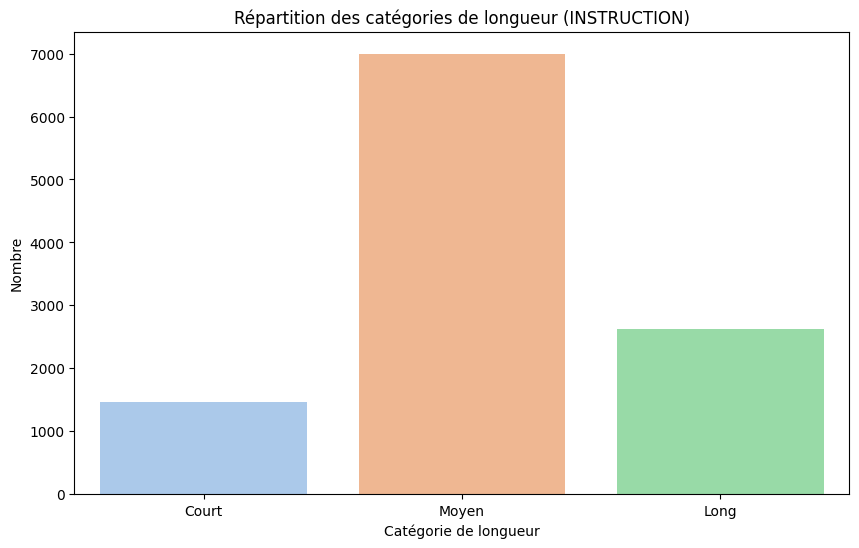

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='INSTRUCTION_category', data=train_df, palette="pastel", order=['Court', 'Moyen', 'Long'])
plt.title('Répartition des catégories de longueur (INSTRUCTION)')
plt.xlabel('Catégorie de longueur')
plt.ylabel('Nombre')
plt.show()

La majorité des instructions se trouvent dans la catégorie **Moyen** (50-150 caractères), ce qui suggère que les consignes sont généralement bien équilibrées entre brièveté et clarté. Les instructions longues (> 150 caractères) constituent une part notable, apportant probablement un contexte plus détaillé pour des réponses plus complexes. Enfin, les instructions courtes (< 50 caractères) sont les moins fréquentes, reflétant une préférence pour des consignes fournissant un minimum de contexte. Cette répartition diversifiée offre un bon équilibre pour entraîner un modèle capable de gérer différentes complexités d'instructions.

<ipython-input-39-8c1d34c3c3d3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RESPONSE_category', data=train_df, palette="pastel", order=['Court', 'Moyen', 'Long'])


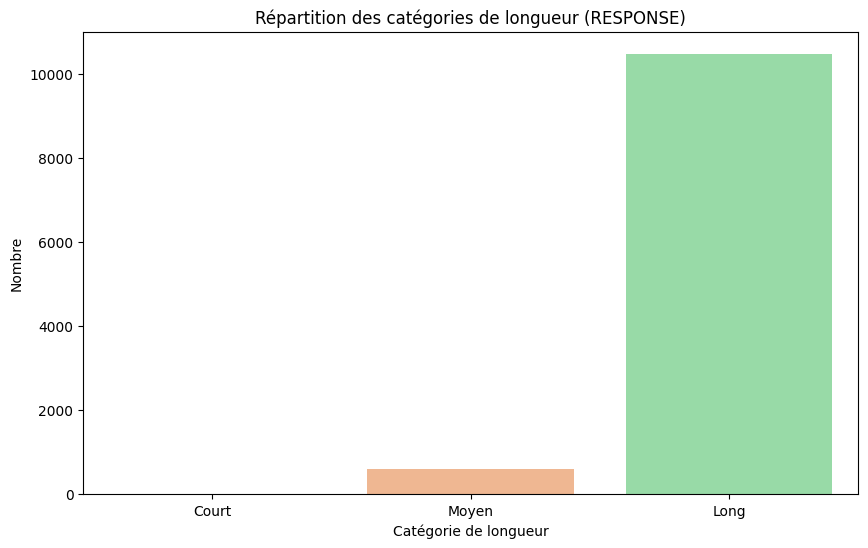

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x='RESPONSE_category', data=train_df, palette="pastel", order=['Court', 'Moyen', 'Long'])
plt.title('Répartition des catégories de longueur (RESPONSE)')
plt.xlabel('Catégorie de longueur')
plt.ylabel('Nombre')
plt.show()

La majorité des réponses appartiennent à la catégorie **Long** (> 150 caractères), ce qui indique que les poèmes générés sont généralement détaillés et développés, fournissant un contenu riche en réponse aux instructions. Les réponses de longueur moyenne (50-150 caractères) sont rares, tandis que les réponses courtes (< 50 caractères) sont presque inexistantes, montrant une préférence marquée pour des réponses substantiellement élaborées. Cette répartition est cohérente avec l'objectif de générer des poèmes riches et expressifs, bien adaptés au contexte des instructions.

**Distribution des Longueurs**

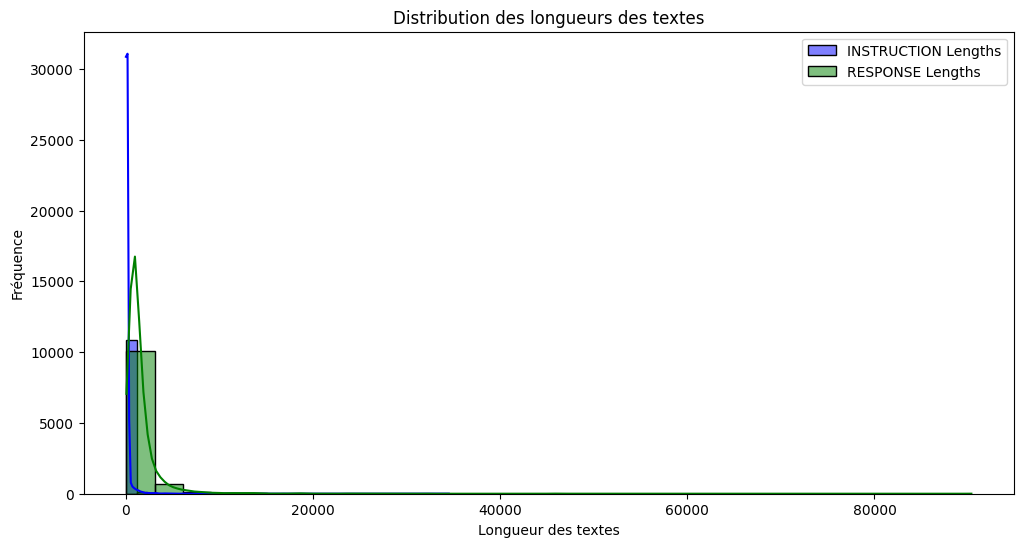

In [40]:
# Visualisation des distributions des longueurs
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(train_df['INSTRUCTION_length'], bins=30, kde=True, label="INSTRUCTION Lengths", color='blue')
sns.histplot(train_df['RESPONSE_length'], bins=30, kde=True, label="RESPONSE Lengths", color='green')
plt.title('Distribution des longueurs des textes')
plt.xlabel('Longueur des textes')
plt.ylabel('Fréquence')
plt.legend()
plt.show()

Ce graphe montre une nette différence entre la distribution des longueurs des instructions et des réponses. Les instructions, généralement comprises entre **50 et 200 caractères**, sont relativement courtes et concentrées autour d'une moyenne basse, indiquant leur rôle de consignes claires et concises. En revanche, les réponses sont beaucoup plus longues, avec une large distribution allant jusqu'à **plus de 50 000 caractères**, reflétant la richesse et la profondeur des poèmes générés. Cette distinction est cohérente avec le besoin d'instructions simples pour produire des sorties détaillées et élaborées.

**Analyse de la diversité lexicale**

In [41]:
import re

def calculate_lexical(column):
    # Combiner tout le texte en une seule chaîne
    all_text = ' '.join(column)

    # convertir tout en minuscules et retirer les ponctuations
    all_text_cleaned = re.sub(r'[^\w\s]', '', all_text.lower())

    # Séparer les mots
    words = all_text_cleaned.split()

    # Identifier les mots uniques
    unique_words = set(words)

    # Calculer la diversité lexicale
    return len(unique_words) / len(words) if len(words) > 0 else 0

In [42]:
INSTRUCTION_diversity = calculate_lexical(train_df['INSTRUCTION'])
RESPONSE_diversity = calculate_lexical(train_df['RESPONSE'])

print("Diversité lexicale (INSTRUCTION): ", INSTRUCTION_diversity)
print("Diversité lexicale (RESPONSE): ", RESPONSE_diversity)

Diversité lexicale (INSTRUCTION):  0.09232166743962315
Diversité lexicale (RESPONSE):  0.045307977886799855


**1. Diversité lexicale des instructions** : **0.092**  
   - Environ **9%** des mots dans les instructions sont uniques, ce qui montre une diversité modérée. Cela reflète la variété des consignes, avec des termes qui reviennent fréquemment pour structurer les demandes.

**2. Diversité lexicale des réponses** : **0.045**  
   - La diversité lexicale est nettement plus faible pour les réponses, avec environ **5%** de mots uniques. Cela indique une utilisation récurrente de motifs poétiques ou stylistiques propres à la génération de poèmes.

**Corrélation entre la longueur des instructions et des poeme**

In [43]:
length_correlation = train_df['INSTRUCTION_length'].corr(train_df['RESPONSE_length'])
print("Corrélation des longueurs: ", length_correlation)

Corrélation des longueurs:  -0.04996630520440724


La corrélation légèrement négative (**-0.04**) entre la longueur des instructions et celle des réponses indique qu'il n'existe presque aucune relation linéaire entre ces deux variables. Cela suggère que la longueur des poèmes générés ne dépend pas directement de la longueur des instructions.

**Similarité entre instructions et réponses**

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Vectorisation TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(train_df['INSTRUCTION'] + train_df['RESPONSE'])

# Calcul de similarité moyenne
cosine_similarities = cosine_similarity(tfidf_matrix)
average_similarity = cosine_similarities.mean()

average_similarity

0.023922962464544142

La similarité cosinus moyenne est faible (**0.024**), indiquant que les instructions et réponses du dataset ont un contenu lexical globalement peu similaire, ce qui reflète une bonne diversité dans les données.

In [45]:
def classify_sentence_type(text):
    if '?' in text:
        return 'question'
    elif '!' in text:
        return 'exclamation'
    else:
        return 'neutral'

train_df['INSTRUCTION_type'] = train_df['INSTRUCTION'].apply(classify_sentence_type)
train_df['RESPONSE_type'] = train_df['RESPONSE'].apply(classify_sentence_type)

# Proportions des types
INSTRUCTION_type_distribution = train_df['INSTRUCTION_type'].value_counts(normalize=True)
RESPONSE_type_distribution = train_df['RESPONSE_type'].value_counts(normalize=True)

In [46]:
print("Instruction Type Distribution: \n",INSTRUCTION_type_distribution)

Instruction Type Distribution: 
 INSTRUCTION_type
neutral        0.771001
question       0.226383
exclamation    0.002617
Name: proportion, dtype: float64


In [47]:
print("Resonse Type Distribution: \n",RESPONSE_type_distribution)

Resonse Type Distribution: 
 RESPONSE_type
neutral        0.518091
question       0.340973
exclamation    0.140937
Name: proportion, dtype: float64


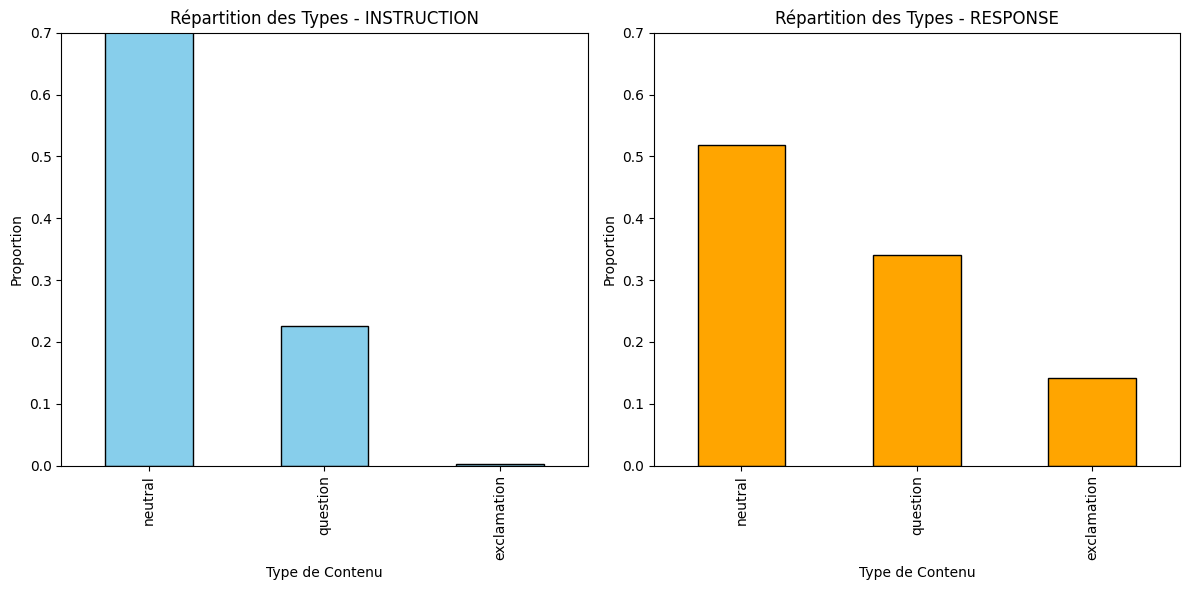

In [48]:
# Visualisation des distributions des types
plt.figure(figsize=(12, 6))

# Distribution des types des instructions
plt.subplot(1, 2, 1)
INSTRUCTION_type_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Répartition des Types - INSTRUCTION')
plt.xlabel('Type de Contenu')
plt.ylabel('Proportion')
plt.ylim(0, 0.7)

# Distribution des types des réponse
plt.subplot(1, 2, 2)
RESPONSE_type_distribution.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Répartition des Types - RESPONSE')
plt.xlabel('Type de Contenu')
plt.ylabel('Proportion')
plt.ylim(0, 0.7)

plt.tight_layout()
plt.show()

**1. Instructions (INSTRUCTION)** :
   - La majorité des instructions (**77%**) sont de type **neutre**, indiquant qu'elles sont souvent des demandes ou des consignes simples, sans question ni exclamation.
   - Les instructions de type **question** représentent environ **22%**, ce qui reflète des demandes formulées sous forme interrogative.
   - Les instructions avec des exclamations sont très rares (**0.2%**), soulignant que peu de consignes expriment un ton particulièrement emphatique.

**2. Réponses (RESPONSE)** :
   - Les réponses **neutres** restent dominantes (**52%**), mais leur proportion est réduite par rapport aux instructions.
   - Les réponses de type **question** augmentent significativement (**34%**), ce qui peut refléter un style interactif ou des réponses cherchant à engager l'utilisateur.
   - Les réponses avec des **exclamations** sont également plus fréquentes (**14%**), probablement en raison du style poétique qui favorise des expressions emphatiques.

Ce contraste montre que les réponses adoptent un style plus expressif et interactif, s'écartant des instructions qui sont principalement neutres et informatives.

#**2. Nettoyage des données**

Après toute cette exploration effectuée sur nos données (longueurs, similarités, etc.), nous pouvons affirmer que nos données sont bien nettoyées et prêtes à être utilisées pour le fine-tuning de notre modèle 'Mistral'.
C'est ce que nous allons voir dans la suite.

#**3. Préparation des données** :

Dans cette étape, nous sélectionnons un sous-ensemble de l'ensemble d'entraînement. Cela permet de réduire la taille des données pour un traitement plus rapide lors des phases de développement et de test.

In [ ]:
train_df = train_df.sample(frac=0.2, random_state=42)

In [ ]:
train_df.shape

(2217, 4)

In [ ]:
test_df= test_df.sample(frac=0.2, random_state=42)
test_df.shape

(277, 4)

In [ ]:
validation_df= validation_df.sample(frac=0.2, random_state=42)
validation_df.shape

(277, 4)

Configuration de l'utilisation du GPU

In [ ]:
import torch
device_map = {"": torch.cuda.current_device()} if torch.cuda.is_available() else None

Authentification avec Hugging Face

In [ ]:
from huggingface_hub import login
from google.colab import userdata

key = userdata.get('Mistral_7b_instruct_v3')

login(key)

Chargement du modèle et du tokenizer et application de QLoRA

In [ ]:
model_name = "mistralai/Mistral-7B-Instruct-v0.3"

In [ ]:
from transformers import BitsAndBytesConfig
import torch

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16

)

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=quantization_config,
    device_map="auto",
  )

tokenizer_config.json:   0%|          | 0.00/141k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/587k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/601 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.55G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

In [ ]:
tokenizer.pad_token = tokenizer.eos_token

In [ ]:
from peft import LoraConfig, get_peft_model, prepare_model_for_kbit_training

model = prepare_model_for_kbit_training(model)

lora_config = LoraConfig(
    r=64,
    lora_alpha=16,
    lora_dropout=0.1,
    bias="none",
    task_type="CAUSAL_LM",
    target_modules=["q_proj", "k_proj", "v_proj", "o_proj","gate_proj"]
)

model = get_peft_model(model, lora_config)

In [ ]:
model.print_trainable_parameters()

trainable params: 92,274,688 || all params: 7,340,298,240 || trainable%: 1.2571


Test du modèle avant le fine tuning

In [ ]:
from transformers import pipeline

messages = [
    {"role": "user", "content": "Who are you?"},
]
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer)
pipe(messages)

Device set to use cuda:0
The model 'PeftModelForCausalLM' is not supported for text-generation. Supported models are ['BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'LlamaForCausalLM', 'CodeGenForCausalLM', 'CohereForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'DbrxForCausalLM', 'ElectraForCausalLM', 'ErnieForCausalLM', 'FalconForCausalLM', 'FalconMambaForCausalLM', 'FuyuForCausalLM', 'GemmaForCausalLM', 'Gemma2ForCausalLM', 'GitForCausalLM', 'GlmForCausalLM', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoForCausalLM', 'GPTNeoXForCausalLM', 'GPTNeoXJapaneseForCausalLM', 'GPTJForCausalLM', 'GraniteForCausalLM', 'GraniteMoeForCausalLM', 'JambaForCausalLM', 'JetMoeForCausalLM', 'LlamaForCausalLM', 'MambaForCausalLM', 'Mamba2ForCausalLM', 'MarianFor

[{'generated_text': [{'role': 'user', 'content': 'Who are you?'},
   {'role': 'assistant',
    'content': ' I am a language model trained by Mistral AI. I am designed to assist with a wide range'}]}]

Séparation des données en ensembles d'entrée `X` et de sortie `y` pour l'entraînement, la validation et les tests

In [ ]:
X_train_data = train_df['INSTRUCTION'].values
X_validation_data = validation_df['INSTRUCTION'].values
X_test_data = test_df['INSTRUCTION'].values

y_train_data = train_df['RESPONSE'].values
y_validation_data = validation_df['RESPONSE'].values
y_test_data = test_df['RESPONSE'].values

In [ ]:
X_train_data.shape, X_validation_data.shape, X_test_data.shape

((2217,), (277,), (277,))

Tokenisation des données d'entrée (instructions) et de sortie (poemes) pour l'entraînement, la validation et les tests

In [ ]:
# Tokenisation des entrées
X_train_tokens = tokenizer(X_train_data.tolist(), padding=True, truncation=True, return_tensors="pt", max_length=400)
X_validation_tokens = tokenizer(X_validation_data.tolist(), padding=True, truncation=True, return_tensors="pt", max_length=400)
X_test_tokens = tokenizer(X_test_data.tolist(), padding=True, truncation=True, return_tensors="pt", max_length=400)

# Tokenisation des sortie
y_train_tokens = tokenizer(y_train_data.tolist(), padding=True, truncation=True, return_tensors="pt", max_length=400)
y_validation_tokens = tokenizer(y_validation_data.tolist(), padding=True, truncation=True, return_tensors="pt", max_length=400)
y_test_tokens = tokenizer(y_test_data.tolist(), padding=True, truncation=True, return_tensors="pt", max_length=400)


Adaptation des datasets d'entraînement, de validation et de test pour le fine-tuning

In [ ]:
from torch.utils.data import DataLoader, Dataset

class CustomDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.encodings.input_ids)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        label = self.labels.input_ids[idx]
        item['labels'] = torch.tensor(label)
        return item

train_dataset = CustomDataset(X_train_tokens, y_train_tokens)
validation_dataset = CustomDataset(X_validation_tokens, y_validation_tokens)
test_dataset = CustomDataset(X_test_tokens, y_test_tokens)

#**4. Fine-tuning du modèle**

Gestion et optimisation de la mémoire GPU

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
!nvidia-smi

Tue Jan 21 12:30:04 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0              50W / 400W |   5823MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:
!kill -9 <pid>

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `kill -9 <pid>'


In [ ]:
%env PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True

env: PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True


Initialisation de l'accélérateur

In [ ]:
import os
from accelerate import Accelerator
#Configuration des variables d'environnement pour optimiser l'efficacité GPU
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:512"
os.environ["WANDB_DISABLED"] = "true"
os.environ["WANDB_MODE"] = "dryrun"

# Initialisation de l'accélérateur
accelerator = Accelerator(mixed_precision="fp16")

Initialisation de DataCollator

In [ ]:
from transformers import DataCollatorForLanguageModeling
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False,
)

Définition des arguments pour l'entraînement du modèle

In [ ]:
from transformers import TrainingArguments
from trl import SFTTrainer

output_dir = "data/mistral-7b-sft-lora_v0.1"

# Arguments d'entraînement
training_args = TrainingArguments(
    output_dir=output_dir,
    evaluation_strategy="epoch",
    learning_rate=1e-4,
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    num_train_epochs=2,
    # gradient_accumulation_steps=16,
    fp16=True,
    save_steps=100,
    save_total_limit=2,
    logging_dir="./logs",
    logging_steps=10,
    gradient_checkpointing=True,
    optim="adamw_torch",
    report_to="none"
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Fonction de calcul des métriques d'évaluation du modèle

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

def compute_metrics(eval_pred):
    from rouge_score import rouge_scorer

    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)

    # Convertir les prédictions et les labels en texte
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)

    # Filtrer les labels pour exclure les IDs hors du vocabulaire
    filtered_labels = [
        [token_id for token_id in l if 0 <= token_id < tokenizer.vocab_size]
        for l in labels
    ]
    decoded_labels = tokenizer.batch_decode(filtered_labels, skip_special_tokens=True)

    # Calculer les scores ROUGE
    scorer = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL"], use_stemmer=True)
    rouge_scores = [scorer.score(pred, label) for pred, label in zip(decoded_preds, decoded_labels)]

    rouge1 = sum(score["rouge1"].fmeasure for score in rouge_scores) / len(rouge_scores)
    rouge2 = sum(score["rouge2"].fmeasure for score in rouge_scores) / len(rouge_scores)
    rougeL = sum(score["rougeL"].fmeasure for score in rouge_scores) / len(rouge_scores)

    # Calculer la similarité cosinus
    vectorizer = TfidfVectorizer().fit(decoded_preds + decoded_labels)
    tfidf_preds = vectorizer.transform(decoded_preds)
    tfidf_labels = vectorizer.transform(decoded_labels)
    similarities = [cosine_similarity(tfidf_preds[i], tfidf_labels[i])[0][0] for i in range(len(decoded_preds))]
    avg_similarity = sum(similarities) / len(similarities)

    return {
        "rouge1": rouge1,
        "rouge2": rouge2,
        "rougeL": rougeL,
        "similarity": avg_similarity,
    }

Initialisation du Trainer pour le Fine-Tuning

In [ ]:
# Initialiser le trainer
trainer = SFTTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    data_collator=data_collator
)

<ipython-input-76-ac87e57b3bf7>:2: FutureWarning: `tokenizer` is deprecated and removed starting from version 0.16.0 for `SFTTrainer.__init__`. Use `processing_class` instead.
  trainer = SFTTrainer(
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/trl/trainer/sft_trainer.py:300: UserWarning: You passed a processing_class with `padding_side` not equal to `right` to the SFTTrainer. This might lead to some unexpected behaviour due to overflow issues when training a model in half-precision. You might consider adding `processing_class.padding_side = 'right'` to your code.
  warnings.warn(


Lancement de l'entraînement du modèle

In [ ]:
trainer.train()

<ipython-input-67-634a03ef4747>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-67-634a03ef4747>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(label)
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...


Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Similarity
1,0.574500,0.621585,0.693614,0.502645,0.683772,0.560903
2,0.586800,0.597436,0.705587,0.520876,0.693443,0.602329


<ipython-input-67-634a03ef4747>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-67-634a03ef4747>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(label)
<ipython-input-67-634a03ef4747>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-67-634a03ef4747>:14: UserWarning: To copy construct from a tensor, it is recommended to use so

TrainOutput(global_step=4434, training_loss=0.6133149132085481, metrics={'train_runtime': 2466.4555, 'train_samples_per_second': 1.798, 'train_steps_per_second': 1.798, 'total_flos': 7.66842263764992e+16, 'train_loss': 0.6133149132085481, 'epoch': 2.0})

**1. Training Loss**
- **Époque 1 : 0.574500**  
- **Époque 2 : 0.586800**  
- **Observation** : Contrairement à la tendance habituelle, la perte d'entraînement augmente légèrement à l'époque 2, ce qui pourrait être dû à une légère suradaptation ou à une variation introduite par des mécanismes comme la régularisation ou le dropout. Cela nécessite une vérification des hyperparamètres ou des variations aléatoires lors de l'entraînement.

**2. Validation Loss**
- **Époque 1 : 0.621585**  
- **Époque 2 : 0.597436**  
- **Observation** : La perte de validation diminue au fil des époques, montrant que le modèle apprend à mieux généraliser. Cependant, l'amélioration est relativement modeste, indiquant un potentiel de convergence mais suggérant que d'autres itérations ou ajustements pourraient encore améliorer la généralisation.

**3. Scores ROUGE**
- **ROUGE-1** (unigrammes) :  
  - Époque 1 : **0.693614**  
  - Époque 2 : **0.705587**  
  - **Analyse** : Une augmentation du score ROUGE-1 indique que le modèle génère des mots de manière plus précise et pertinente par rapport au texte cible.

- **ROUGE-2** (bigrammes) :  
  - Époque 1 : **0.502645**  
  - Époque 2 : **0.520876**  
  - **Analyse** : L'amélioration progressive du score ROUGE-2 suggère que le modèle construit mieux des séquences locales de deux mots, ce qui améliore la cohérence et le style des poèmes générés.

- **ROUGE-L** (longest common subsequence) :  
  - Époque 1 : **0.683772**  
  - Époque 2 : **0.693443**  
  - **Analyse** : L'augmentation du score ROUGE-L montre que les phrases générées par le modèle deviennent structurellement plus alignées avec les textes de référence.

**4. Similitude Cosinus**
- **Époque 1 : 0.560903**  
- **Époque 2 : 0.602329**  
- **Observation** : Une augmentation progressive de la similarité cosinus indique que les textes générés deviennent sémantiquement plus proches des textes cibles. Le modèle apprend donc à capturer et à reproduire les concepts sous-jacents des instructions et des réponses.

Évaluation finale du modèle sur l'ensemble de test

In [ ]:
results = trainer.evaluate(test_dataset)

<ipython-input-67-634a03ef4747>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-67-634a03ef4747>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(label)


In [ ]:
print("Résultats de l'évaluation :\n", results)

Résultats de l'évaluation :
 {'eval_loss': 0.6225174069404602, 'eval_rouge1': 0.6931440633378818, 'eval_rouge2': 0.5032549691278428, 'eval_rougeL': 0.6816027594515429, 'eval_similarity': 0.5755828805693415, 'eval_runtime': 63.652, 'eval_samples_per_second': 4.352, 'eval_steps_per_second': 4.352, 'epoch': 2.0}


# **5. Évaluation des performances**

Connexion à Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Sauvegarde et exportation du modèle

In [ ]:
trainer.save_model("/content/drive/MyDrive/projet_Gen_ia/mistral7b_on_instruction_poems")

Chargement du modèle finetuner depuis Google Drive

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
import torch

model_name = "/content/drive/MyDrive/projet_Gen_ia/mistral7b_on_instruction_poems"
tokenizer = AutoTokenizer.from_pretrained(model_name)

model = AutoModelForCausalLM.from_pretrained(model_name, torch_dtype=torch.float16)

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Attribution du modèle à l'appareil approprié (GPU ou CPU)

In [ ]:
device_map = "cuda" if torch.cuda.is_available() else "cpu"
if torch.cuda.is_available():
    model = model.to(device_map)
    print("model is in the device")
else:
    model = model.to("cpu")

model is in the device


In [ ]:
validation_df.head()

,INSTRUCTION,RESPONSE
1542,"Compose a poem, about Life Choices,Arts & Scie...","Of course! It's called ""The God Called Poetry""..."
260,"Can you write a poem? Make it about Living,Dea...","Of course! It's called ""Immortality Ode"": \nMi..."
7455,"Compose a poem, about Religion,God & the Divin...","It's called ""Reemergence of the Noose"": \nSome..."
7651,"I want a poem about Activities,Travels & Journ...","Here's your poem about Activities,Travels & Jo..."
10262,"Write me a poem about Living,Death,Parenthood,...","I've written a poem for you about Living,Death..."


In [ ]:
input = validation_df['INSTRUCTION'][260]
print("input : ", input)
print("#"*30)
output =validation_df['RESPONSE'][260]
tokenized_inpout = tokenizer(input, return_tensors="pt", max_length=512, padding=True, truncation=True)
input_ids = tokenized_inpout["input_ids"]
attention_mask = tokenized_inpout["attention_mask"]
response = model.generate(
    input_ids=input_ids.to(model.device),
    attention_mask=attention_mask.to(model.device),
    max_new_tokens=612,
    temperature=0.6,
    top_k=80,
    pad_token_id=tokenizer.eos_token_id
)
response_text = tokenizer.decode(response[0])
predicted_poeme = response_text
print("predicted_poeme :\n ", predicted_poeme)
print("#"*30)
ture_poeme = output
print("ture_poeme : ", ture_poeme)

input :  Can you write a poem? Make it about Living,Death,Time & Brevity,Philosophy.
##############################


/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:650: UserWarning: `do_sample` is set to `False`. However, `top_k` is set to `80` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_k`.
  warnings.warn(


predicted_poeme :
  <s> Can you write a poem? Make it about Living,Death,Time & Brevity,Philosophy.Generate a poem with themes of Living,Death,Time & Brevity,Philosophy.Let us know what you think and leave a comment.
I
The body is a house, and the mind
A garden, and the soul a bird, and the heart
A fountain, and the spirit a flame, and the soul
A star, and the body a shell, and the mind
A river, and the soul a bird, and the spirit
A flame, and the body a shell, and the heart
A fountain, and the soul a star, and the mind
A river, and the spirit a flame, and the body
A shell, and the soul a bird, and the heart
A fountain, and the spirit a flame, and the soul
A star, and the mind a river, and the body
A shell, and the soul a bird, and the heart
A fountain, and the spirit a flame, and the soul
A star, and the mind a river, and the body
A shell, and the soul a bird, and the heart
A fountain, and the spirit a flame, and the soul
A star, and the mind a river, and the body
A shell, and the sou

On remarque clairement que cette sortie générée par notre modèle ne répond pas correctement à ce qui est demandé dans la consigne du prompt. De plus, elle contient des répétitions non nécessaires. Pour éviter ce problème, nous allons tester l'ajout d'un rôle au prompt. Cela permettra à notre modèle de mieux comprendre qu'il doit générer un poeme en suivant précisément les instructions données dans les instructions de l'utilisateur.

In [ ]:
role = "You are a creative assistant. Write a poem based on the given instructions. Use vivid imagery, coherent structure, and align with the themes provided."

In [ ]:
prompt = f" <|system|>role: {role}</s><|user|Instructions: {validation_df['INSTRUCTION'][260]}<|assistant|></s>"

In [ ]:
input = prompt
print("input : ", input)
print("#"*30)
output =validation_df['RESPONSE'][260]
tokenized_inpout = tokenizer(input, return_tensors="pt", max_length=512, padding=True, truncation=True)
input_ids = tokenized_inpout["input_ids"]
attention_mask = tokenized_inpout["attention_mask"]
response = model.generate(
    input_ids=input_ids.to(model.device),
    attention_mask=attention_mask.to(model.device),
    max_new_tokens=400,
    temperature=0.6,
    top_k=60,
    pad_token_id=tokenizer.eos_token_id
)
response_text = tokenizer.decode(response[0])
predicted_poeme = response_text
print("predicted_poeme :\n ", predicted_poeme)

input :   <|system|>role: You are a creative assistant. Write a poem based on the given instructions. Use vivid imagery, coherent structure, and align with the themes provided.</s><|user|Instructions: Can you write a poem? Make it about Living,Death,Time & Brevity,Philosophy.<|assistant|></s>
##############################
predicted_poeme :
  <s> <|system|>role: You are a creative assistant. Write a poem based on the given instructions. Use vivid imagery, coherent structure, and align with the themes provided.</s><|user|Instructions: Can you write a poem? Make it about Living,Death,Time & Brevity,Philosophy.<|assistant|></s>|Philosophy|Death|Time & Brevity|Social Commentaries|War & Conflict|Mythology & Folklore|Heroes & Patriotism|Memorial Day|<|assistant|>Memorial Day is a time to honor and remember the brave men and women who have died in service to our country. Here is a poem about war, death, and patriotism:

In Flanders fields the poppies blow
Between the crosses, row on row,
That

On remarque que cette sortie est plus cohérente.

In [ ]:
ture_poeme = output
print("ture_poeme : ", ture_poeme)

ture_poeme :  Of course! It's called "Immortality Ode": 
Miss Bliss, once I thought I was endless

since father was perpetual in his grade school

of seedlings in cups, the overly loved pets, and recess

while mother was the lipsticked dancing girl

on the Steel Pier who would outstep Hitler.

I was insufferable when I rolled

the Volkswagen bus two times and lived

with the snow chains like costumed jewels

slung over me and the spare rolled

away as in a folktale.

The pact I made in the spinning instant

said in my language of American

boy, Put up or shut up, to God,

the State Trooper who was kind

and spoke of service and punishment

and giving yourself away.

Now, I’m alive through the agency

of iron and contract work and appeals

to the fallen—angel and dusk—

but wet-winged and still without you,

Miss Bliss, who took me inside

where there was an ocean

before which we were children.

That calm, that fear,

that witness of the two-thirds

of everything else. 
Source: PoetryF

In [ ]:
print(predicted_poeme)

<s> <|system|>role: You are a creative assistant. Write a poem based on the given instructions. Use vivid imagery, coherent structure, and align with the themes provided.</s><|user|Instructions: Can you write a poem? Make it about Living,Death,Time & Brevity,Philosophy.<|assistant|></s>|Philosophy|Death|Time & Brevity|Social Commentaries|War & Conflict|Mythology & Folklore|Heroes & Patriotism|Memorial Day|<|assistant|>Memorial Day is a time to honor and remember the brave men and women who have died in service to our country. Here is a poem about war, death, and patriotism:

In Flanders fields the poppies blow
Between the crosses, row on row,
That mark our place; and in the sky
The larks, still bravely singing, fly
Scarce heard amid the guns below.

We are the Dead. Short days ago
We lived, felt dawn, saw sunset glow,
Loved and were loved, and now we lie
In Flanders fields.

Take up our quarrel with the foe:
To you from failing hands we throw
The torch; be yours to hold it high.
Its fl

Extraire la réponse générée par le model

In [ ]:
import re

def extract_response(output):
    try:
        # Chercher la balise <|assistant|> suivie de contenu
        match = re.search(r"<\|assistant\|>(.+?)(</s>|$)", output, re.DOTALL)
        if match:
            # Récupérer le contenu après <|assistant|>
            response = match.group(1).strip()
            return response if response else None
    except Exception as e:
        print(f"Erreur lors de l'extraction : {e}")
    return None


Tester la fonction `extract_response`

In [ ]:
print(extract_response(predicted_poeme))

</s>|Philosophy|Death|Time & Brevity|Social Commentaries|War & Conflict|Mythology & Folklore|Heroes & Patriotism|Memorial Day|<|assistant|>Memorial Day is a time to honor and remember the brave men and women who have died in service to our country. Here is a poem about war, death, and patriotism:

In Flanders fields the poppies blow
Between the crosses, row on row,
That mark our place; and in the sky
The larks, still bravely singing, fly
Scarce heard amid the guns below.

We are the Dead. Short days ago
We lived, felt dawn, saw sunset glow,
Loved and were loved, and now we lie
In Flanders fields.

Take up our quarrel with the foe:
To you from failing hands we throw
The torch; be yours to hold it high.
Its flame to keep the Memorial Day,
Its glory to light the IIII
Its heroism to arm Ihe free,
Its history to foster peace,
To hallow memory and cherish reunion.

Except where otherwise noted, this poem is in the public domain. It was written by John McCrae, a Canadian physician and soldier

Fonction pour générer des prédictions et sauvegarder les résultats

In [ ]:
def generate_poeme(dataset, output_file):
    results = []
    for index, row in dataset.iterrows():
        i = index
        prompt = f" <|system|>role: {role}</s><|user|>Instructions: {dataset['INSTRUCTION'][i]}<|assistant|></s>"
        input = prompt
        output = dataset['RESPONSE'][i]
        tokenized_inpout = tokenizer(input, return_tensors="pt", max_length=512, padding=True, truncation=True)
        input_ids = tokenized_inpout["input_ids"]
        attention_mask = tokenized_inpout["attention_mask"]
        response = model.generate(
            input_ids=input_ids.to(model.device),
            attention_mask=attention_mask.to(model.device),
            max_new_tokens=400,
            temperature=0.6,
            top_k=60,
            pad_token_id=tokenizer.eos_token_id
        )
        response_text = tokenizer.decode(response[0])
        predicted_poeme = extract_response(response_text)
        ture_poeme = output
        results.append({
          "Index": index,
          "Entred_prompt": input,
          "Model_response": response_text,
          "Ture_poeme": ture_poeme,
          "Predicted_poeme": predicted_poeme,
        })
        # print(i, "Entred_prompt : ", input, "ture_poeme : ", output)
        # print("#"*100)
        print("predicted_poeme : ", predicted_poeme)
        print("#"*100)
        print("response_text  : ", response_text)
    df_results = pd.DataFrame(results)
    df_results.to_csv(output_file, index=False)
    print(f"Les prédictions ont été enregistrées dans {output_file}")

Nous allons tester sur notre jeu de données de test:

In [ ]:
test_df.shape

(277, 2)

Génération des prédictions :

In [ ]:
generate_poeme(test_df, "/content/drive/MyDrive/projet_Gen_ia/test_df.csv")

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.









predicted_poeme :  </s>|God & the Divine|History & Politics|War & Conflict|Mythology & Folklore|Heroes & Patriotism|Memorial Day|Fourth of July|Independence Day|Veterans Day|Martin Luther King Jr. Day|Memorial Day|Fourth of July|Independence Day|Veterans Day|Martin Luther King Jr. Day|Memorial Day|Fourth of July|Independence Day|Veterans Day|Martin Luther King Jr. Day|Memorial Day|Fourth of July|Independence Day|Veterans Day|Martin Luther King Jr. Day|Memorial Day|Fourth of July|Independence Day|Veterans Day|Martin Luther King Jr. Day|Memorial Day|Fourth of July|Independence Day|Veterans Day|Martin Luther King Jr. Day|Memorial Day|Fourth of July|Independence Day|Veterans Day|Martin Luther King Jr. Day|Memorial Day|Fourth of July|Independence Day|Veterans Day|Martin Luther King Jr. Day|Memorial Day|Fourth of July|Independence Day|Veterans Day|Martin Luther King Jr. Day|Memorial Day|Fourth of July|Inde

Chargement des prédictions générées depuis les fichiers sauvegardés

In [ ]:
testdata = pd.read_csv("/content/drive/MyDrive/projet_Gen_ia/test_df.csv")

In [ ]:
testdata

,Index,Entred_prompt,Model_response,Ture_poeme,Predicted_poeme
0,12086,<|system|>role: You are a creative assistant....,<s> <|system|>role: You are a creative assista...,"I've written a poem for you about Activities,T...","</s>|Poem|\r\n\r\nIn the heart of the city, wh..."
1,13246,<|system|>role: You are a creative assistant....,<s> <|system|>role: You are a creative assista...,"How about calling it ""The Spider""? \nSource: P...","</s><s>I'll call this poem ""The Spider and the..."
2,5901,<|system|>role: You are a creative assistant....,<s> <|system|>role: You are a creative assista...,"Of course! It's called ""The Window"": \nyou are...",</s>|Relationships|
3,5420,<|system|>role: You are a creative assistant....,<s> <|system|>role: You are a creative assista...,"I've written a poem for you about Living,Death...",</s>|Sorrow & Grieving|Love|Realistic & Compli...
4,3493,<|system|>role: You are a creative assistant....,<s> <|system|>role: You are a creative assista...,"I've written a poem for you about Love,Break-u...",</s>|Break-ups & Vexed Love|\r\n\r\nWhen the s...
...,...,...,...,...,...
272,9382,<|system|>role: You are a creative assistant....,<s> <|system|>role: You are a creative assista...,"Here's a poem I composed about Love,Desire,Hea...",</s>|Heartache & Loss|Heartache & Loss|Heartac...
273,10462,<|system|>role: You are a creative assistant....,<s> <|system|>role: You are a creative assista...,"I've written a poem for you about Living,Growi...",</s>|Gender & Sexuality|\r\n\r\nIn the garden ...
274,7848,<|system|>role: You are a creative assistant....,<s> <|system|>role: You are a creative assista...,I've written a poem for you about Relationship...,"</s>|Relationships|Men & Women|Nature|Seas, Ri..."
275,9610,<|system|>role: You are a creative assistant....,<s> <|system|>role: You are a creative assista...,"I've written a poem for you about The Body,Rel...","</s>|The Body|\nI\nThe body, a temple, a vesse..."


###**Évaluation des prédictions générées**

Dans cette section, nous évaluons les poèmes générés par le modèle en utilisant des métriques telles que **ROUGE** et la **similarité cosinus**. Cette évaluation compare les poèmes générés avec les véritables poèmes présents dans notre dataset, permettant d'analyser leur cohérence, leur pertinence, et leur fidélité aux instructions données. Le calcul comprend :

- **ROUGE-1, ROUGE-2, ROUGE-L** : Mesurent la précision des prédictions en termes de correspondance lexicale avec les poèmes de référence.
- **Similarité cosinus** : Évalue la proximité sémantique entre les poèmes générés et les poèmes de référence, tout en tenant compte des nuances thématiques.

In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 8.6 MB/s eta 0:00:00


In [ ]:
!pip install rouge-score

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from rouge_score import rouge_scorer
import pandas as pd

def evaluate_generated_poeme(test_data_path):
    # Charger les données générées
    test_data = pd.read_csv(test_data_path)

    # Vérifier si les colonnes nécessaires sont présentes
    required_columns = ["Ture_poeme", "Predicted_poeme"]
    for column in required_columns:
        if column not in test_data.columns:
            raise ValueError(f"La colonne '{column}' est manquante !!!")

    # Récupérer les vraies poemes et générées et remplacer les NaN par des chaînes vides
    Ture_poeme = test_data["Ture_poeme"].fillna("")
    Predicted_poeme = test_data["Predicted_poeme"].fillna("")

    # Initialiser le calculateur ROUGE
    scorer = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL"], use_stemmer=True)
    rouge_scores = [scorer.score(pred, label) for pred, label in zip(Predicted_poeme, Ture_poeme)]

    # Calculer les scores moyens ROUGE
    rouge1 = sum(score["rouge1"].fmeasure for score in rouge_scores) / len(rouge_scores)
    rouge2 = sum(score["rouge2"].fmeasure for score in rouge_scores) / len(rouge_scores)
    rougeL = sum(score["rougeL"].fmeasure for score in rouge_scores) / len(rouge_scores)

    # Calculer la similarité cosinus
    vectorizer = TfidfVectorizer().fit(Predicted_poeme + Ture_poeme)
    tfidf_preds = vectorizer.transform(Predicted_poeme)
    tfidf_labels = vectorizer.transform(Ture_poeme)
    similarities = [
        cosine_similarity(tfidf_preds[i], tfidf_labels[i])[0][0] for i in range(len(Predicted_poeme))
    ]
    avg_similarity = sum(similarities) / len(similarities)

    # Retourner les métriques
    return {
        "rouge1": rouge1,
        "rouge2": rouge2,
        "rougeL": rougeL,
        "similarity": avg_similarity,
    }

In [ ]:
# Chemin de notre testdataset.csv
test_data_path = "/content/drive/MyDrive/projet_Gen_ia/test_df.csv"

# évaluation
metrics = evaluate_generated_poeme(test_data_path)

# Afficher les résultats
print("Résultats de l'évaluation :")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

Résultats de l'évaluation :
rouge1: 0.0906
rouge2: 0.0178
rougeL: 0.0645
similarity: 0.0866


**Interprétation des résultats :**

Les résultats montrent que le modèle produit des poèmes qui ont une faible correspondance lexicale et sémantique avec les poèmes de référence, comme l'indiquent les scores ROUGE et de similarité cosinus :

**1. Scores ROUGE** :
- **ROUGE-1 : 0.0906**  
  Ce score mesure la correspondance des mots individuels (unigrammes) entre les poèmes générés et les poèmes de référence. Le score est faible, indiquant que les mots exacts des poèmes de référence sont rarement repris dans les prédictions.

- **ROUGE-2 : 0.0178**  
  Ce score mesure la correspondance des bigrammes (paires de mots). Il est encore plus faible, ce qui suggère que les relations immédiates entre les mots ne sont pas bien capturées par le modèle.

- **ROUGE-L : 0.0645**  
  Ce score reflète la plus longue sous-séquence commune entre les poèmes générés et les poèmes de référence. La faible valeur indique que la structure globale des poèmes générés diverge significativement des poèmes de référence.

**2. Similarité cosinus : 0.0866**
- Ce score mesure la proximité sémantique entre les poèmes générés et les poèmes de référence. La valeur est également faible, ce qui signifie que, même sur le plan thématique ou conceptuel, les poèmes générés s'éloignent des intentions originales des instructions.

### **Visualisations des resultats :**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
test_data = pd.read_csv(test_data_path)

# Graphique à barres des scores ROUGE
def plot_rouge_scores(metrics):
    rouge_data = {
        "ROUGE-1": metrics["rouge1"],
        "ROUGE-2": metrics["rouge2"],
        "ROUGE-L": metrics["rougeL"],
    }
    plt.figure(figsize=(8, 6))
    sns.barplot(x=list(rouge_data.keys()), y=list(rouge_data.values()), palette="Blues_d")
    plt.title("Scores ROUGE moyens")
    plt.xlabel("Type de ROUGE")
    plt.ylabel("Score")
    plt.ylim(0, 1)
    plt.show()

Visualisation des scores ROUGE


<ipython-input-131-d88c128bd48f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(rouge_data.keys()), y=list(rouge_data.values()), palette="Blues_d")


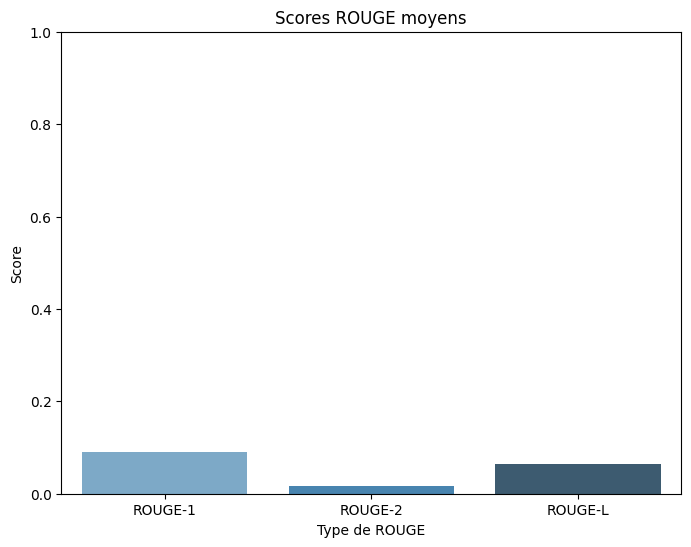

In [ ]:
# Visualiser les résultats
print("Visualisation des scores ROUGE")
plot_rouge_scores(metrics)

Ces résultats soulignent une compréhension insuffisante des instructions et des poèmes cibles, mettant en évidence la nécessité d'améliorer le fine-tuning du modèle ou d'enrichir la qualité des données d'entraînement.

**Distribution des similarités cosinus**

In [ ]:
def plot_cosine_similarity_distribution(similarities):
    plt.figure(figsize=(8, 6))
    sns.histplot(similarities, bins=30, kde=True, color="green")
    plt.title("Distribution des similarités cosinus")
    plt.xlabel("Similarité cosinus")
    plt.ylabel("Fréquence")
    plt.xlim(0, 1)
    plt.show()

Visualisation des similarités cosinus


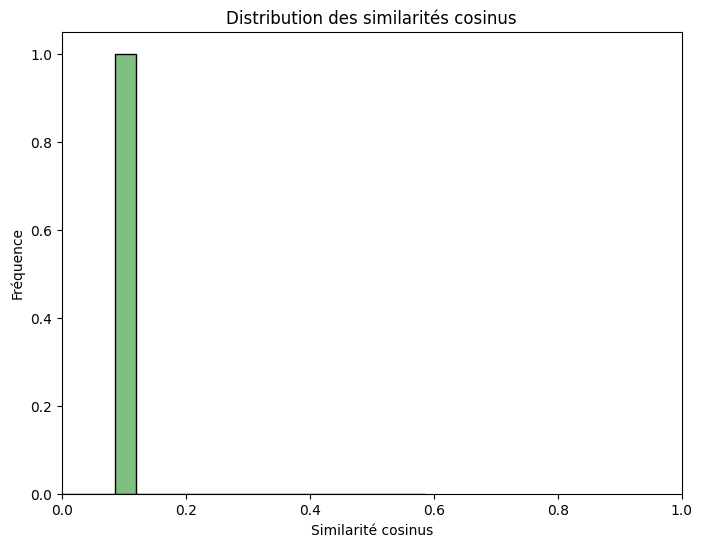

In [ ]:
print("Visualisation des similarités cosinus")
cosine_similarities = metrics["similarity"]
plot_cosine_similarity_distribution([cosine_similarities])

La distribution des similarités cosinus montre une concentration des valeurs très proches de **0**, indiquant que les poèmes générés par le modèle ont une faible proximité sémantique avec les poèmes de référence. Cela reflète un décalage significatif entre le contenu attendu et les réponses produites par le modèle. Bien que notre objectif principal soit de développer un modèle capable de générer des poèmes cohérents et pertinents qui répondent parfaitement aux instructions, même s'ils ne sont pas identiques à ceux du dataset, les résultats obtenus montrent que les poèmes générés par le modèle manquent de cohérence et de qualité globale. Cela souligne la nécessité d'améliorer le fine-tuning du modèle ou de retravailler l'interprétation des instructions.

**Comparaison des longueurs des textes générés et des vérités de référence**

In [ ]:
def plot_length_comparison(test_data):
    test_data["True_poeme_length"] = test_data["Ture_poeme"].fillna("").apply(len)
    test_data["Predicted_poeme_length"] = test_data["Predicted_poeme"].fillna("").apply(len)

    plt.figure(figsize=(8, 6))
    sns.histplot(test_data["True_poeme_length"], bins=30, color="blue", label="Longueur des poemes vraies", kde=True)
    sns.histplot(test_data["Predicted_poeme_length"], bins=30, color="orange", label="Longueur des poemes générées", kde=True)
    plt.title("Distribution des longueurs des poemes")
    plt.xlabel("Longueur des poemes")
    plt.ylabel("Fréquence")
    plt.legend()
    plt.show()

Comparaison des longueurs des poemes


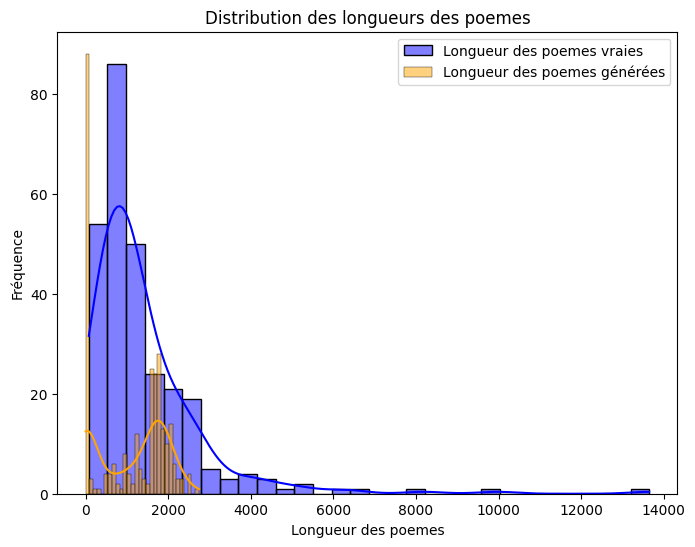

In [ ]:
print("Comparaison des longueurs des poemes")
plot_length_comparison(testdata)

Le graphique montre une différence notable entre les longueurs des poèmes générés et des poèmes de référence. Les poèmes générés sont généralement beaucoup plus courts et concentrés autour de faibles longueurs, tandis que les poèmes de référence ont une répartition plus large et incluent des textes significativement plus longs. Cela indique que le modèle a tendance à produire des réponses brèves et manque de profondeur ou de complexité comparée aux poèmes attendus.

# **Conclusion Générale**

Dans ce projet, nous avons entrepris le fine-tuning du modèle **Mistral 7B** dans le but de générer des poèmes cohérents, créatifs et alignés sur des instructions spécifiques. Ce processus a impliqué des étapes essentielles, telles que l'exploration et la préparation des données, l'entraînement du modèle, et une évaluation rigoureuse des performances à l'aide des métriques **ROUGE** et de la **similarité cosinus**.

Les résultats obtenus montrent que le modèle a une capacité limitée à capturer la complexité des thèmes et des styles poétiques. Bien que certains poèmes générés respectent partiellement les instructions, les scores faibles en **ROUGE** et en **similarité cosinus** reflètent des lacunes en termes de cohérence, de profondeur thématique et de fidélité aux poèmes de référence. Par ailleurs, les poèmes générés tendent à être significativement plus courts et moins élaborés, ce qui limite leur impact créatif.


### **Perspectives**

Pour surmonter ces limitations et améliorer les performances du modèle, plusieurs axes d'amélioration sont envisageables :

1. **Amélioration des données d'entraînement** :
   - Enrichir le dataset avec des poèmes plus variés, couvrant un éventail plus large de styles et de thèmes.
   - Utiliser des données plus propres et mieux alignées avec les instructions pour renforcer la qualité des exemples.

2. **Optimisation du fine-tuning** :
   - Augmenter le nombre d'époques pour permettre une convergence plus approfondie.
   - Optimiser les hyperparamètres (taux d'apprentissage, taille des batchs, etc.) pour maximiser l'apprentissage.

3. **Ajustements les paramètres d'inférence**.

4. **Exploration de nouveaux modèles** :
   - Tester des modèles récents et spécialisés dans les tâches d'instruction, tels que **LLaMA 3 Instruct**, **Falcon**, ou d'autres variantes optimisées pour la génération textuelle. Ces modèles pourraient offrir une meilleure capacité à comprendre et à répondre aux consignes complexes.